<a href="https://colab.research.google.com/github/GreNinja47/Lead-Scoring-the-referral-voluntaries/blob/main/Lead_Scoring_Customers_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
leads = pd.read_csv("/content/gdrive/MyDrive/Projects/Lead Scoring/Leads.csv")

In [ ]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
leads.shape

(9240, 37)

In [ ]:
# check the summary for the numeric column
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [ ]:
leads.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [ ]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [ ]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [ ]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
# From the value count we can see there is two column name for google isused so replace the name 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
leads['Specialization'].isnull().sum()

1438

In [ ]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Few columns have 'Select' as a value this is probabily because the lead has not selected any options from the dropdown ofthe form and by default the column value is 'Select'.
So we can consider these column as blank or 'Nan', replace the 'Select' value with 'Nan'. The columns are:
* Lead Profile
* Specialization
* City
* How did you hear about X Education

In [ ]:
# Convert the value select to null
Select = ['Lead Profile','Specialization','City','How did you hear about X Education']
for i in Select:
    leads[i][leads[i] == 'Select'] = np.nan

In [ ]:
# Check weather the Select value is replaced by null or not.
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [ ]:
# Get the percentage of null value in each column
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [ ]:
# Remove columns of application data with percentage of null value greater than 45%
leads = leads.loc[:,((leads.isnull().sum()/len(leads))*100) <= 45]

In [ ]:
# Check percentage of null value again
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

Columns TotalVisits, Page Views Per Visit, Last Activity, Lead Source have very less missing values so we can remove those rows which have missing value as 1% or 2% it will not affect our analysis

In [ ]:
#Check number of columns with TotalVisits is null
leads['TotalVisits'].isnull().sum()

137

In [ ]:
#Remove the rows with null value of TotalVisits
leads = leads[~leads['TotalVisits'].isnull()]

In [ ]:
# Check the number of null value again
leads['TotalVisits'].isnull().sum()

0

In [ ]:
# Check number of null value for Page Views Per Visit
leads['Page Views Per Visit'].isnull().sum()

0

In [ ]:
# Check number of null value for Last Activity
leads['Last Activity'].isnull().sum()

0

In [ ]:
# Check number of null value for Lead Source
leads['Lead Source'].isnull().sum()

29

In [ ]:
#Remove the rows with null value of Lead Source
leads = leads[~leads['Lead Source'].isnull()]

In [ ]:
# Check null value count for Lead Source
leads['Lead Source'].isnull().sum()

0

City 39.707792

Specialization 36.580087

Tags 36.287879

What matters most to you in choosing a course 29.318182

What is your current occupation 29.112554

Country 26.634199

In [ ]:
# Value percentage of City
leads['City'].value_counts(normalize = True)

Mumbai                         0.577741
Thane & Outskirts              0.135479
Other Cities                   0.123659
Other Cities of Maharashtra    0.081106
Other Metro Cities             0.068558
Tier II Cities                 0.013457
Name: City, dtype: float64

City colunmn has around 40% missing value and if we see the rest 60 % data, out of 60%, 35% is only from mumbai and so the data is very much skewed. so better we can drop this column

In [ ]:
# Drop City column
leads = leads.drop('City', axis =1)

In [ ]:
# Get the percentage of each value in the country column
leads['Country'].value_counts(normalize = True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

we can see the country column is highly skewed as 95% data is from India only, the data from all other country is very less and will not help in our analysis so better we will drop this column

In [ ]:
# Drop City column
leads = leads.drop('Country', axis =1)

Specialization 36.580087 Tags 36.287879 What matters most to you in choosing a course 29.318182 What is your current occupation 29.112554

In [ ]:
leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.557320
Human Resource Management            14.450967
Marketing Management                 14.209254
Operations Management                 8.615331
Business Administration               6.888812
IT Projects Management                6.319061
Supply Chain Management               5.973757
Banking, Investment And Insurance     5.783840
Travel and Tourism                    3.487569
Media and Advertising                 3.487569
International Business                3.038674
Healthcare Management                 2.693370
E-COMMERCE                            1.916436
Hospitality Management                1.916436
Retail Management                     1.726519
Rural and Agribusiness                1.260359
E-Business                            0.984116
Services Excellence                   0.690608
Name: Specialization, dtype: float64

In [ ]:
leads['Specialization'].isnull().sum()

3282

In [ ]:
# Create a seperate category 'Others' for null value
leads['Specialization'][leads['Specialization'].isnull()] = 'Others'

In [ ]:
leads['Specialization'].isnull().sum()

0

In [ ]:
# bucketing the specialization value which has less percentage below 10
leads['Specialization'] = np.where(leads['Specialization'].isin(leads['Specialization'].value_counts().index[:4]),
                                   leads['Specialization'], 'Other_specialization')

In [ ]:
leads['Specialization'].value_counts(normalize = True)*100

Others                       36.169275
Other_specialization         34.968041
Finance Management           10.568658
Human Resource Management     9.224157
Marketing Management          9.069870
Name: Specialization, dtype: float64

In [ ]:
# Tags
leads['Tags'].value_counts(normalize = True)*100

Will revert after reading the email                  35.079172
Ringing                                              20.654254
Interested in other courses                           8.856795
Already a student                                     8.091178
Closed by Horizzon                                    5.237515
switched off                                          4.176092
Busy                                                  3.219071
Lost to EINS                                          2.992866
Not doing further education                           2.523056
Interested  in full time MBA                          2.018444
Graduation in progress                                1.931442
invalid number                                        1.444232
Diploma holder (Not Eligible)                         1.096224
wrong number given                                    0.817818
opp hangup                                            0.574213
number not provided                                   0

In [ ]:
# Count of null value present in Tags column
leads['Tags'].isnull().sum()

3327

In [ ]:
# convert the null value with Others value
leads['Tags'][leads['Tags'].isnull()] = 'Others'

In [ ]:
# Count of null value present in Tags column
leads['Tags'].isnull().sum()

0

In [ ]:
# Count of value present in Tags column
leads['Tags'].value_counts(normalize = True)*100

Others                                               36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [ ]:
# What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999686
Flexibility & Convenience    0.000157
Other                        0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [ ]:
leads['What matters most to you in choosing a course'].isnull().sum()

2702

value is highly skewed so better drop the column as it will not help in the analysis

In [ ]:
# Drop the column
leads = leads.drop('What matters most to you in choosing a course', axis =1)

In [ ]:
# What is your current occupation
leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
leads['What is your current occupation'].isnull().sum()

2683

In [ ]:
# Replacing the other values except Unemployed, Working Professional to Other_occupation
leads['What is your current occupation'] = np.where(leads['What is your current occupation'].
                                                    isin(leads['What is your current occupation'].
                                                         value_counts().index[:2]), leads['What is your current occupation'],
                                                    'Other_occupation')

In [ ]:
leads['What is your current occupation'].value_counts()

Unemployed              5476
Other_occupation        2921
Working Professional     677
Name: What is your current occupation, dtype: int64

Drop identifiers column from the data


In [ ]:
# Drop the lead number
leads= leads.drop('Prospect ID', axis =1)

Binary Variables: - 'Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview','Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'

Check value count for binary variables


In [ ]:
leads['Do Not Email'].value_counts(normalize = True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

In [ ]:
leads['Do Not Call'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [ ]:
leads['Search'].value_counts(normalize = True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [ ]:
leads['Newspaper Article'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [ ]:
leads['X Education Forums'].value_counts(normalize = True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [ ]:
leads['Newspaper'].value_counts(normalize = True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [ ]:
leads['Digital Advertisement'].value_counts(normalize = True)

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

In [ ]:
leads['Through Recommendations'].value_counts(normalize = True)

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

In [ ]:
leads['A free copy of Mastering The Interview'].value_counts(normalize = True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [ ]:
leads['Magazine'].value_counts(normalize = True)

No    1.0
Name: Magazine, dtype: float64

In [ ]:
leads['Receive More Updates About Our Courses'].value_counts(normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [ ]:
leads['Update me on Supply Chain Content'].value_counts(normalize = True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [ ]:
leads['Get updates on DM Content'].value_counts(normalize = True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [ ]:
leads['I agree to pay the amount through cheque'].value_counts(normalize = True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

value is highly skewed so better drop the column as it will not help in the analysis


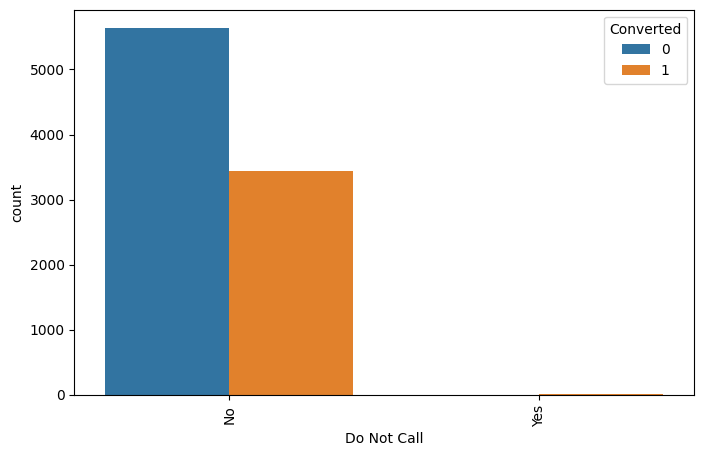

In [ ]:
# Plot Do Not Call for converted and not converted
plt.figure(figsize=(8, 5))
s1 = sns.countplot(x='Do Not Call', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

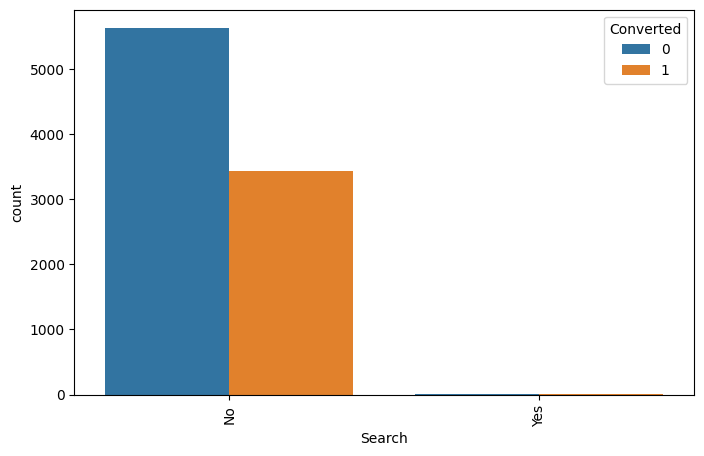

In [ ]:
# Plot Search for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(x='Search',hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

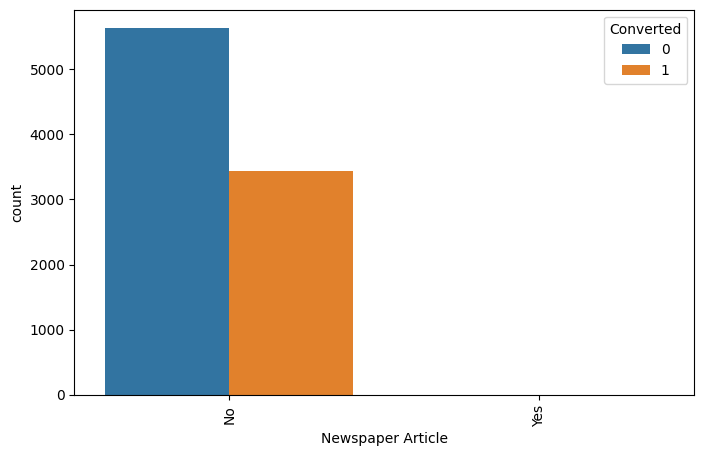

In [ ]:
# Plot Newspaper Article for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(x='Newspaper Article',hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

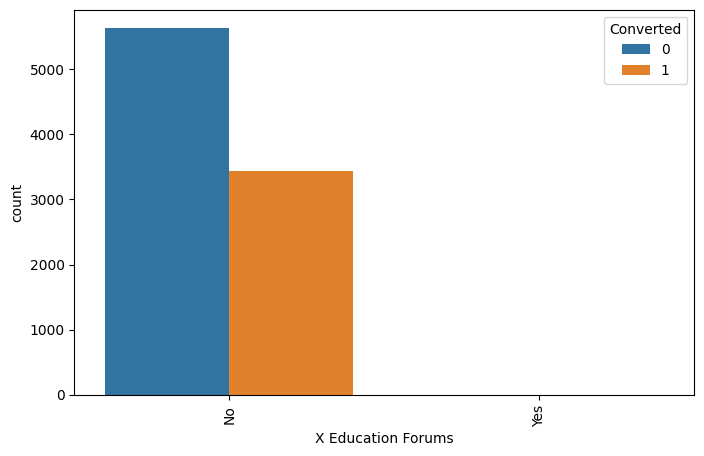

In [ ]:
# Plot X Education Forums for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(x='X Education Forums',hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

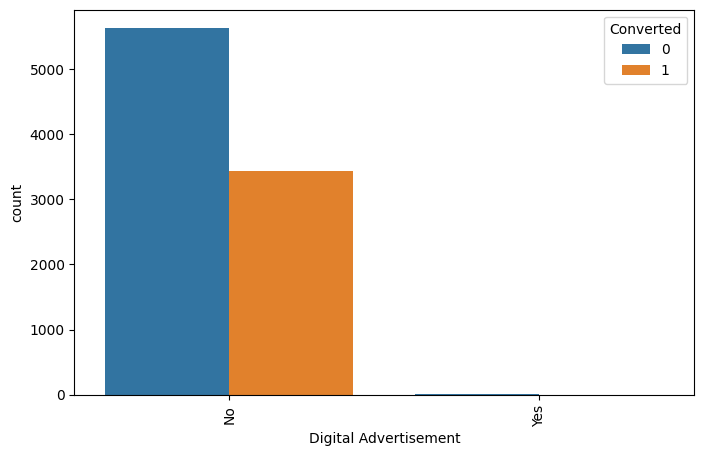

In [ ]:
# Plot Digital Advertisement for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(x ='Digital Advertisement',hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# drop the columns with 99 and 100 % same values
leads = leads.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                    'Through Recommendations','Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [ ]:
leads.shape

(9074, 14)

Outlier Treatment


In [ ]:
# checking outliers at 25%, 50%, 75%, 90%, 95%, 99%
leads_num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
leads_num.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


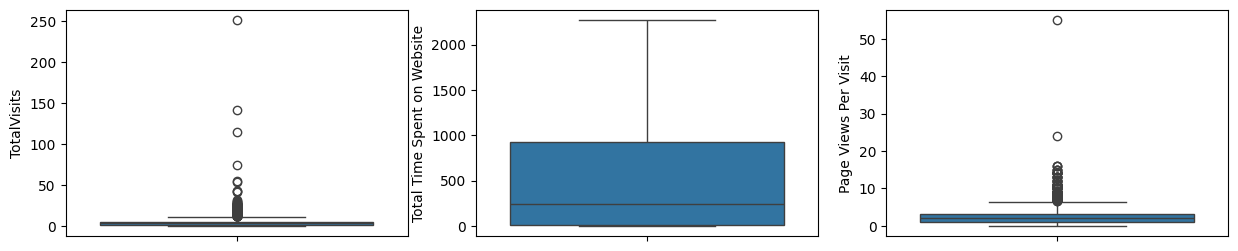

In [ ]:
# Check the outliers for continious variable
plt.figure(figsize = [15,10])
feature = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(leads[i[1]])

Outliers are present in 2 columns
* Page Views Per Visit
* TotalVisits

In [ ]:
# Cap the outlier of TotalVisits by 95 percentile
q4 = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits']>=q4] = q4

In [ ]:
# Cap the outliers of Page Views Per Visit by 95 percentile
q4 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=q4] = q4

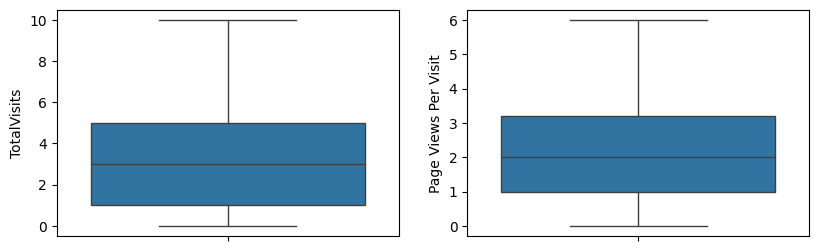

In [ ]:
# Check the outliers for continious variable
plt.figure(figsize = [15,10])
feature = leads[['TotalVisits','Page Views Per Visit']]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(leads[i[1]])

EDA

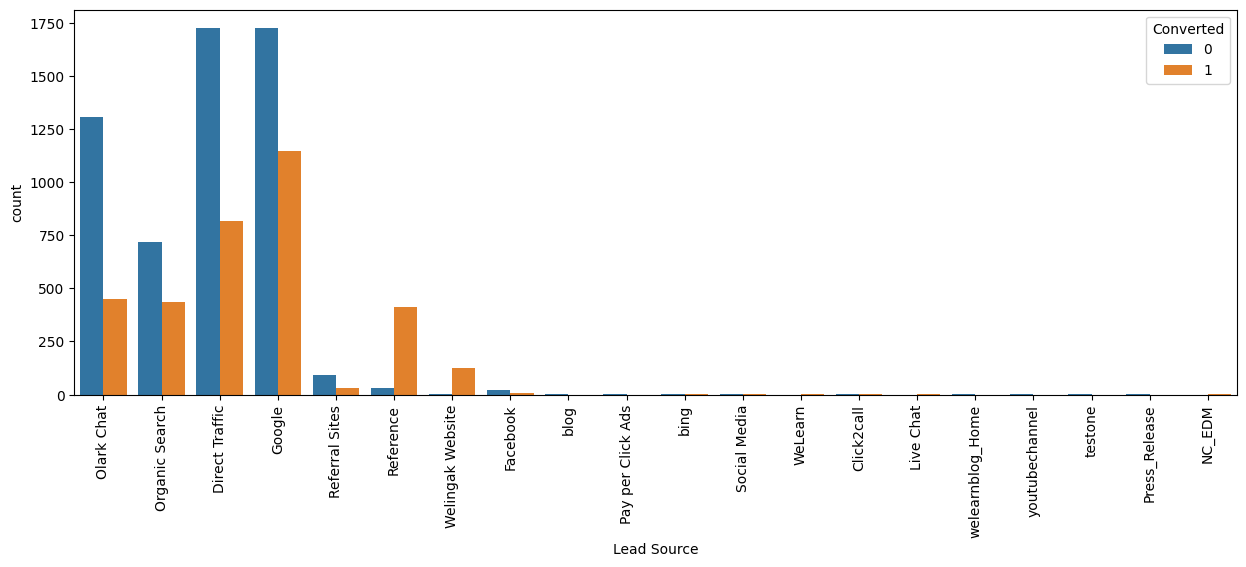

In [ ]:
# Plot lead Source for conveted and not converted
plt.figure(figsize=(15,5))
s1=sns.countplot(x ='Lead Source',hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

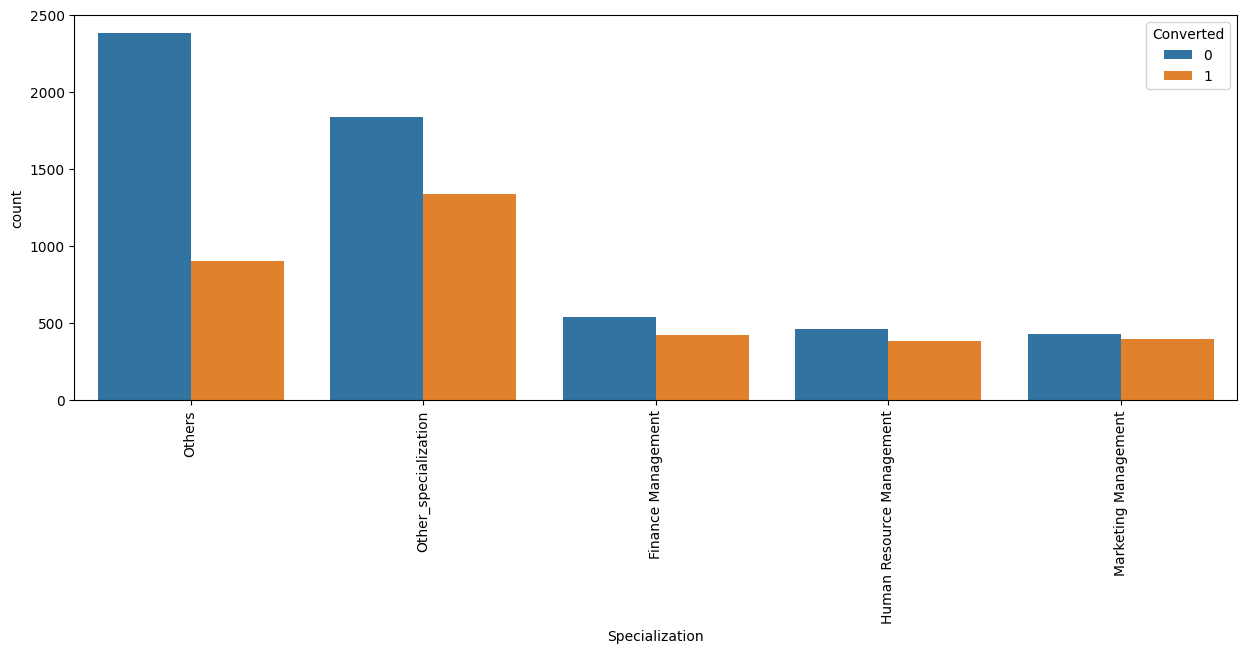

In [ ]:
#plotting spread of Country columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(x ='Specialization',hue='Converted', data=leads)
s1.set(xlabel = 'Specialization')
plt.xticks(rotation=90)
plt.show()

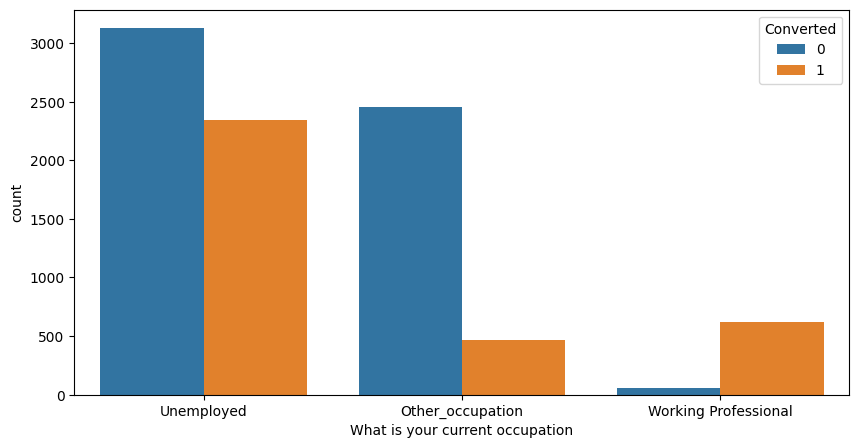

In [ ]:
# Plot What is your current occupation
plt.figure(figsize=(10,5))
s2=sns.countplot(x ='What is your current occupation',hue='Converted', data=leads)
s2.set(xlabel = 'What is your current occupation')
plt.xticks(rotation=0)
plt.show()

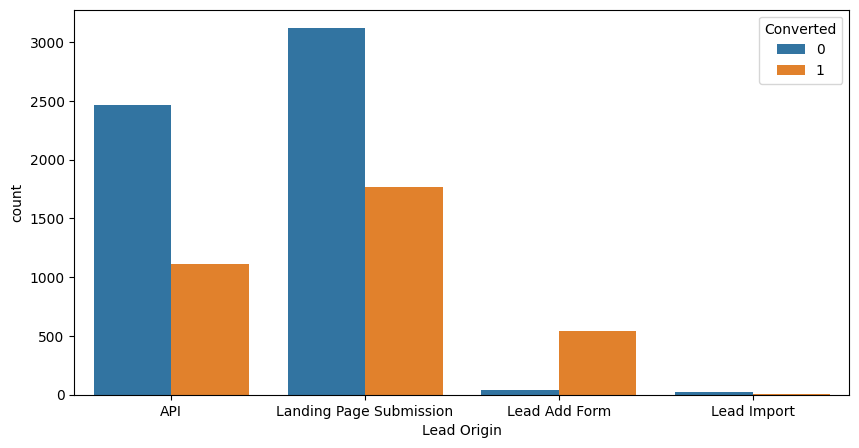

In [ ]:
#visualizing count of Variable Lead Origin based on Converted value
plt.figure(figsize=(10,5))
s2=sns.countplot(x ='Lead Origin',hue='Converted', data=leads)
s2.set(xlabel = 'Lead Origin')
plt.xticks(rotation=0)
plt.show()

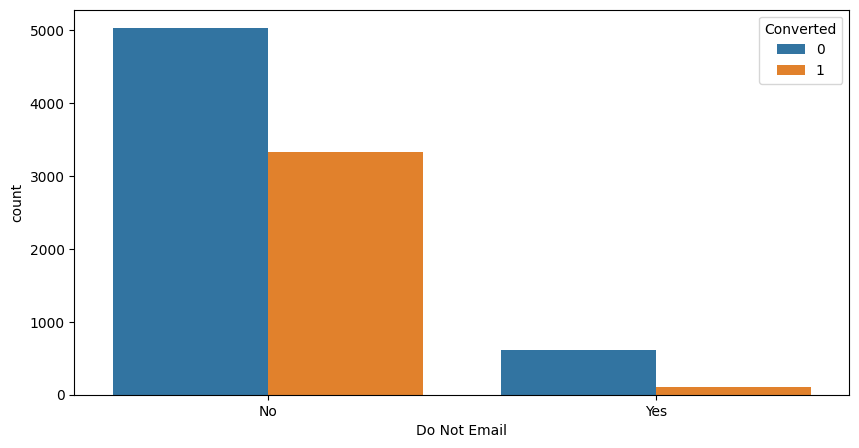

In [ ]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(x ='Do Not Email',hue='Converted', data=leads)
s2.set(xlabel = 'Do Not Email')
plt.xticks(rotation=0)
plt.show()

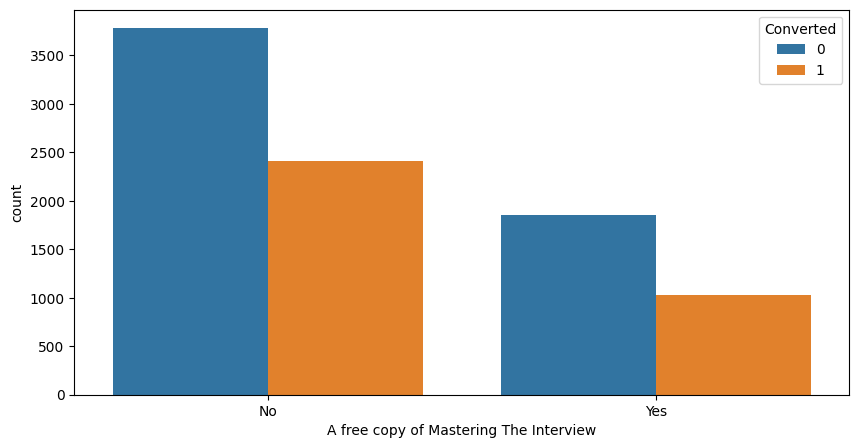

In [ ]:
#visualizing count of Variable Do Not Email based on Converted value
plt.figure(figsize=(10,5))
s2=sns.countplot(x ='A free copy of Mastering The Interview',hue='Converted', data=leads)
s2.set(xlabel = 'A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.show()

Data Preparation

Converting some binary variables (Yes/No) to 0/1

Binary variables present in the data set:

* Do Not Email,
* A free copy of Mastering The Interview.

In [ ]:
# List of variables to map for binary value

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the binary variables
leads[varlist] = leads[varlist].apply(binary_map)

In [ ]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other_specialization,Other_occupation,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Other_specialization,Unemployed,Ringing,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified


In [ ]:
leads.shape

(9074, 14)

In [ ]:
# There are some column which are filles by sales team and having a call so we dont want these column at model building time.
leads = leads.drop(['Last Activity','Tags'], axis = 1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Other_specialization,Other_occupation,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_specialization,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,0,Modified


Create Dummy Variables

In [ ]:
# Check the values for lead source
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Social Media          0.022041
Live Chat             0.022041
Press_Release         0.022041
Pay per Click Ads     0.011020
blog                  0.011020
WeLearn               0.011020
welearnblog_Home      0.011020
youtubechannel        0.011020
testone               0.011020
NC_EDM                0.011020
Name: Lead Source, dtype: float64

In [ ]:
# Bucket all the categories whose percentage is below 20%
leads['Lead Source'] = np.where(leads['Lead Source'].isin(leads['Lead Source'].value_counts().index[:2]),
                                leads['Lead Source'], 'Others')

In [ ]:
# Check the values for lead source
leads['Lead Source'].value_counts(normalize = True)*100

Others            40.312982
Google            31.661891
Direct Traffic    28.025127
Name: Lead Source, dtype: float64

In [ ]:
# Check the value for Last Activity
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [ ]:
# Bucket all the categories whose percentage is very less
leads['Last Notable Activity'] = np.where(leads['Last Notable Activity'].isin(leads['Last Notable Activity'].value_counts().index[:3]),
                                leads['Last Notable Activity'], 'Others')

In [ ]:
# Check the value for Last Activity
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified        36.003967
Email Opened    31.110866
SMS Sent        23.716112
Others           9.169054
Name: Last Notable Activity, dtype: float64

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [ ]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

Creating dummy variables for the categorical variables and dropping specific level.

In [ ]:
# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Landing Page Submission column
ml1 = ml.drop(['Lead Origin_Landing Page Submission'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

In [ ]:
# Creating dummy variables for the variable 'Lead Source'.
lo = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
lo1 = lo.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

In [ ]:
# Creating dummy variables for the variable 'Specialization'.
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,sp1], axis=1)

In [ ]:
# Creating dummy variables for the variable 'Last Notable Activity'.
lna = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Activity')
lna1 = lna.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lna1], axis=1)

In [ ]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Other_specialization', 'Last Activity_Email Opened',
       'Last Activity_Modified', 'Last Activity_SMS Sent'],
      dtype='object')

Dropping the repeated variables

In [ ]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation',
                    'Last Notable Activity'],1)

In [ ]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,1,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,660681,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9074 non-null   int64  
 1   Do Not Email                              9074 non-null   int64  
 2   Converted                                 9074 non-null   int64  
 3   TotalVisits                               9074 non-null   float64
 4   Total Time Spent on Website               9074 non-null   int64  
 5   Page Views Per Visit                      9074 non-null   float64
 6   A free copy of Mastering The Interview    9074 non-null   int64  
 7   Lead Origin_API                           9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                 9074 non-null   uint8  
 9   Lead Origin_Lead Import                   9074 non-null   uint8  
 10  Lead Source_Direct Traffic          

In [ ]:
leads.shape

(9074, 19)

In [ ]:
leads.duplicated().sum()

0

In [ ]:
# Checking the converted rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% convert rate so we cant say its that much imbalance data we should worry about

Train Test Split

In [ ]:
import statsmodels.api as sm

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
leads = leads.set_index('Lead Number')
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0
660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,1,0,0
660727,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0
660681,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,1,0,0
660727,0,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,0
660719,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0
660681,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Putting response variable to y
y = leads['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [ ]:
X.shape, y.shape

((9074, 17), (9074,))

Assumptions of Logistic Regression :

1. Binary Logistic Regression requires the dependent variable to be binary - (Bernoulli Distribution) - checked
2. Independence of Observations - the observations need to be independent of each other
3. Linearity of independent variables and log of odds. Log(x) or Logit
4. Absence of Multicolinarity
5. Requires large sample size - checked

<Axes: >

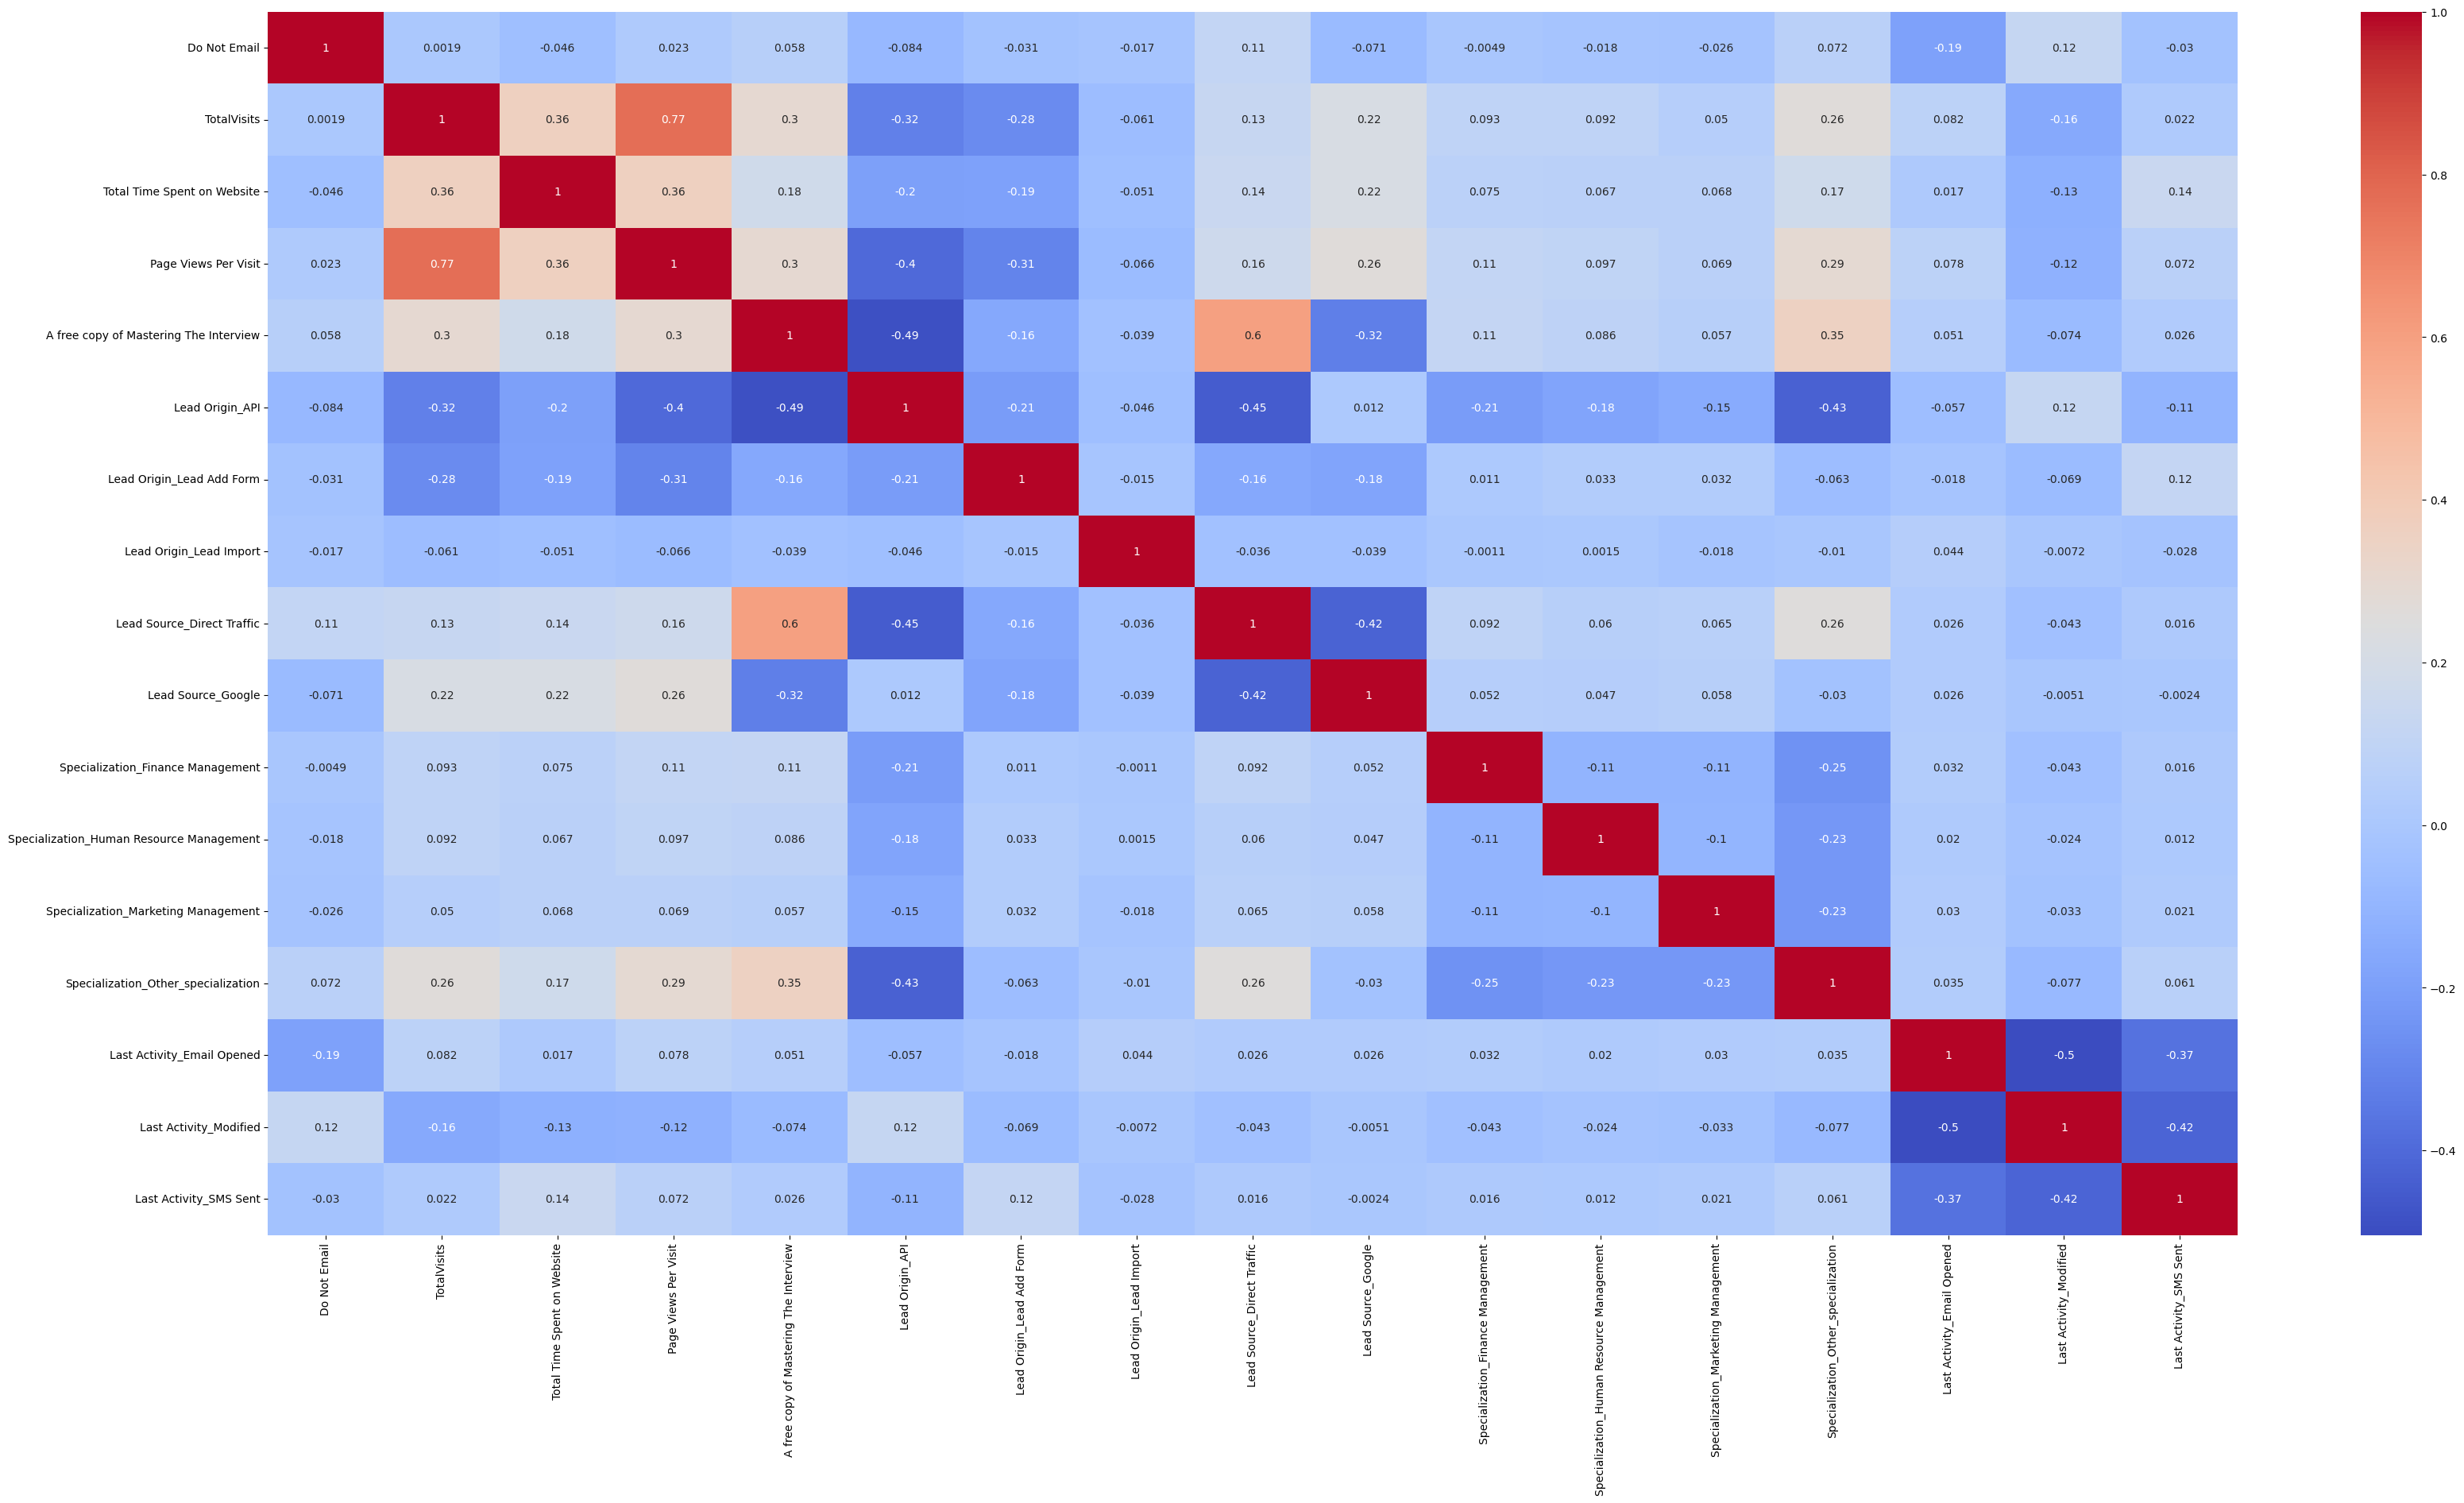

In [ ]:
# Checking the Assumptions 2 and 4

plt.figure(figsize=(40,20))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True)

Observations : We see Total visits, pages viewed per visit are only features having the coorelation above 75% rest features are descently well to follow the assumption

In [ ]:
X.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,3.191867,482.887481,2.265943,0.318272,0.394313,0.064029,0.003306,0.280251,0.316619,0.105687,0.092242,0.090699,0.349680,0.311109,0.360040,0.237161
std,0.269608,2.780618,545.256560,1.790991,0.465831,0.488730,0.244818,0.057407,0.449147,0.465183,0.307453,0.289383,0.287196,0.476895,0.462973,0.480038,0.425365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,922.750000,3.200000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,10.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_linearity = X[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]

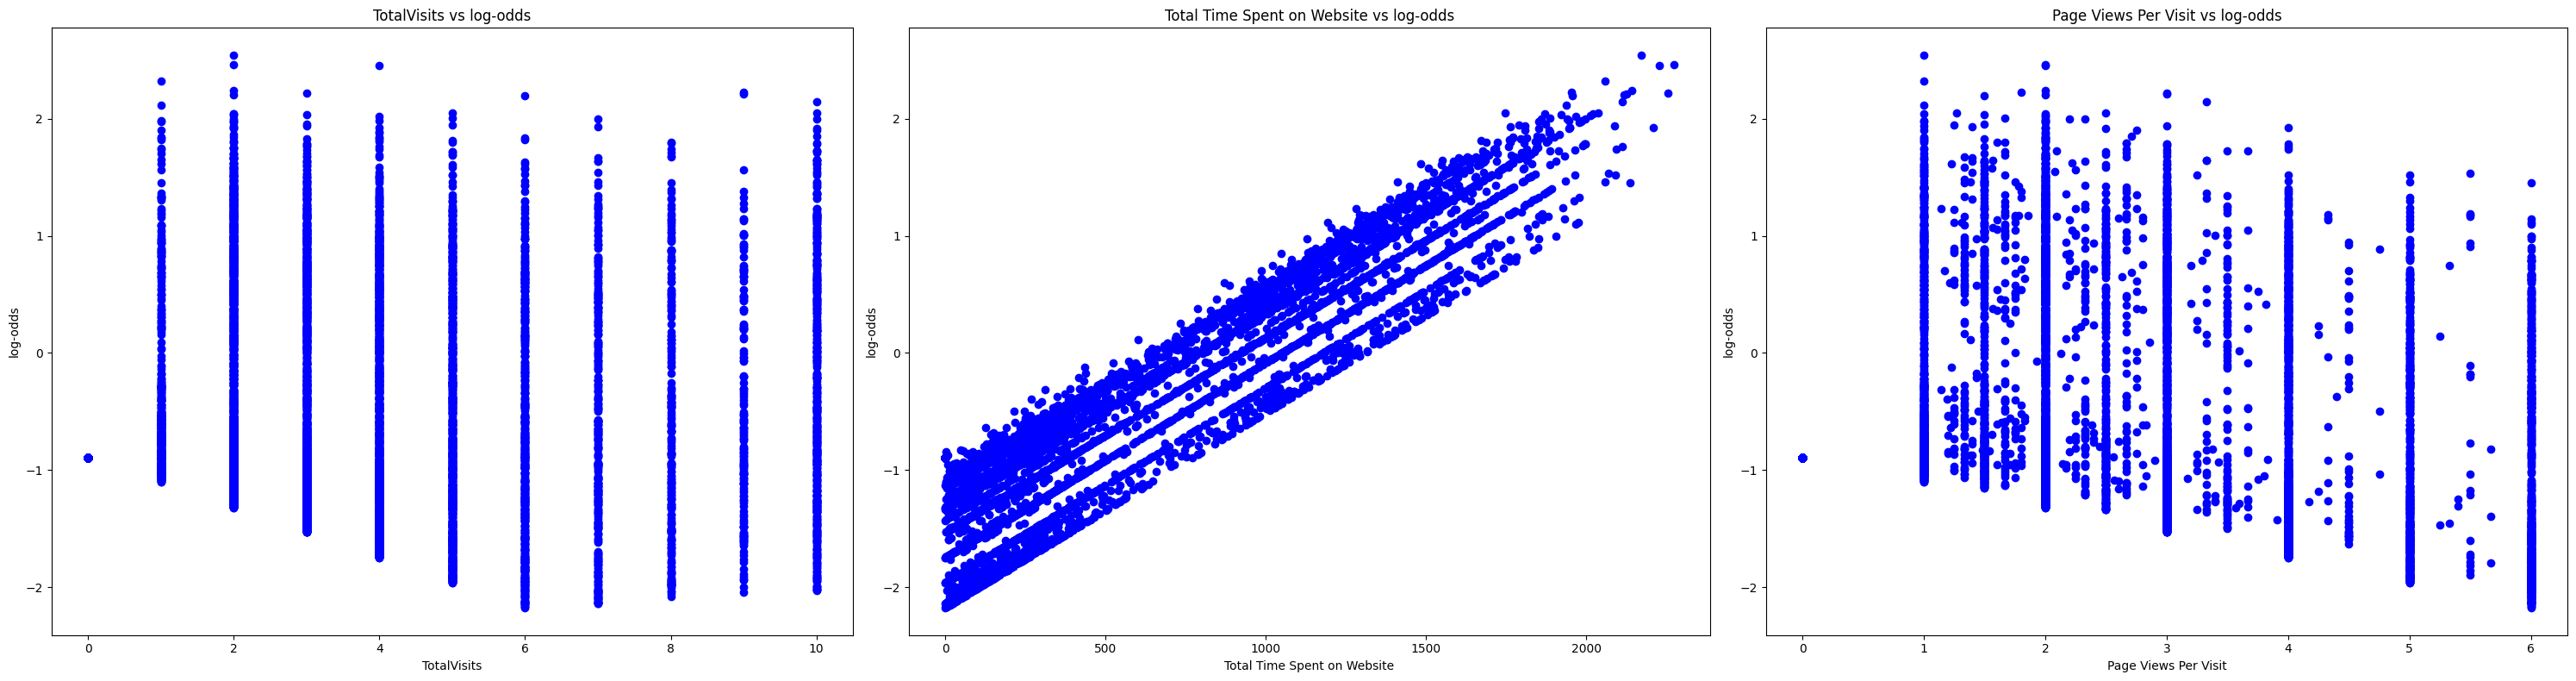

In [ ]:
# checking the assumption 3 : Linearity of independent variables and log of odds. Log(x) or Logit

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_linearity, y)

predicted = model.predict_proba(X_linearity)[:, 1]

log_odds = np.log(predicted / (1 - predicted))

num_rows = 1
num_cols = min(3, X_linearity.shape[1])

fig, ax = plt.subplots(num_rows, num_cols, figsize=(30, 8))

X_linearity_np = X_linearity.to_numpy()

for i, col in enumerate(X_linearity.columns):
    col_idx = i
    ax[col_idx].scatter(X_linearity_np[:, i], log_odds, color="blue")
    ax[col_idx].set_xlabel(col)
    ax[col_idx].set_ylabel("log-odds")
    ax[col_idx].set_title(f"{col} vs log-odds")

plt.tight_layout()
plt.show()

Observations : There is strong relationship between 'Total time spent on website' feature with log odds of the converted user (target variable) and mild relations with 'Total Visits' and "Page Views Per Vist' has no significant saying on it . Which summarizes that the user who take interest in buying the course would probably spent more time in reviewing or looking the details than non buyers

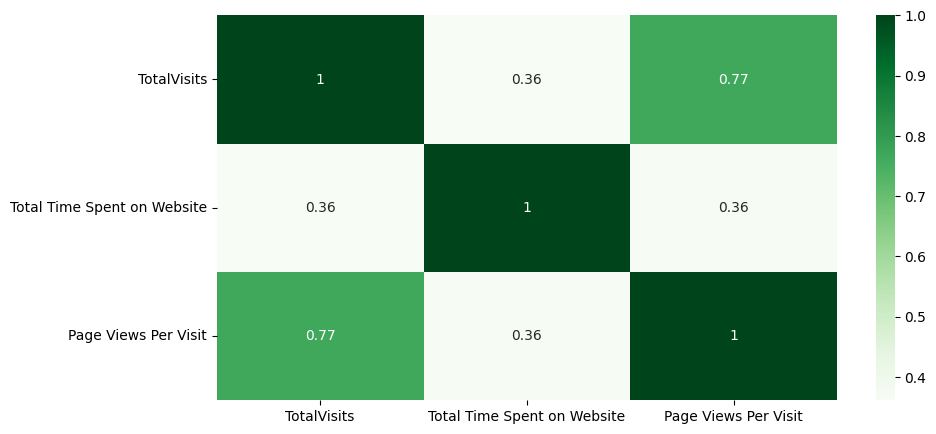

In [ ]:
# Let's see the correlation matrix
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),annot = True, cmap = 'Greens')
plt.show()

In [ ]:
X.drop(['TotalVisits', 'Page Views Per Visit'], axis=1, inplace=True)

<Axes: >

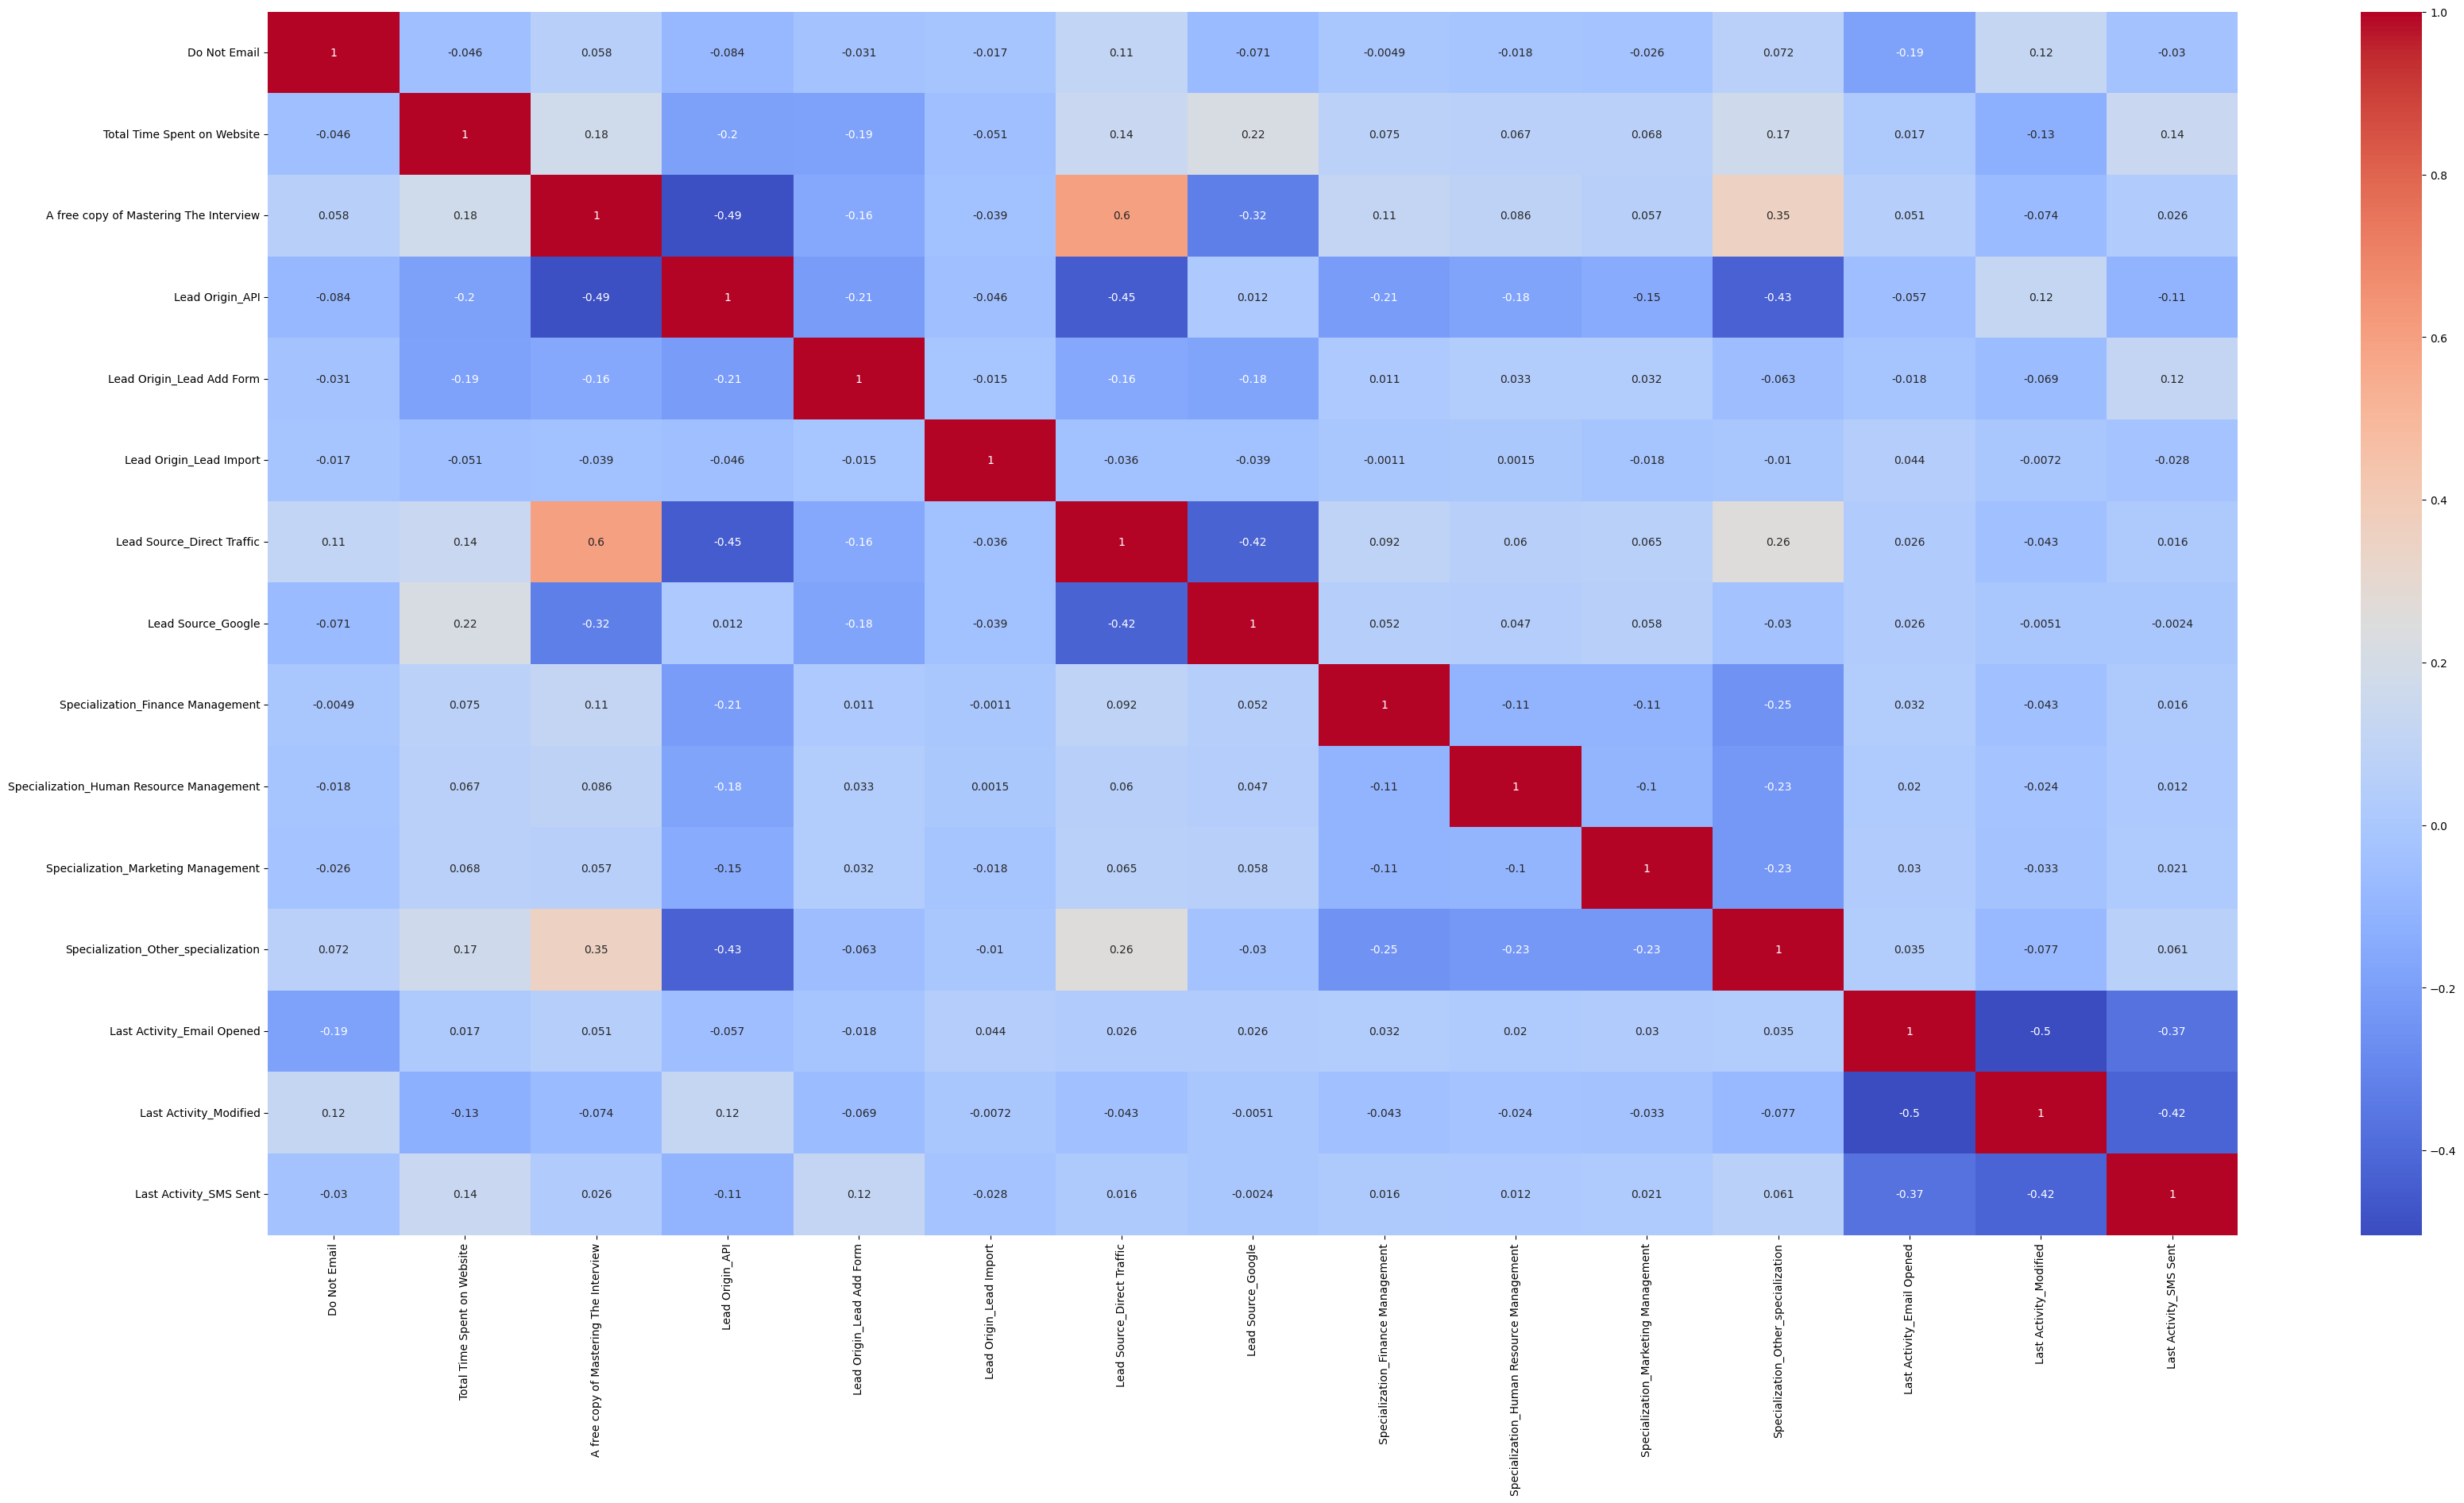

In [ ]:
# Checking the Assumptions 2 and 4

plt.figure(figsize=(40,20))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True)

Observations : Leads scource direct traffic and A free copy of mastering the interview are only features having the coorelation at 60% remaining features are descently well to follow the assumption

In [ ]:
X_linearity = X[['Total Time Spent on Website']]

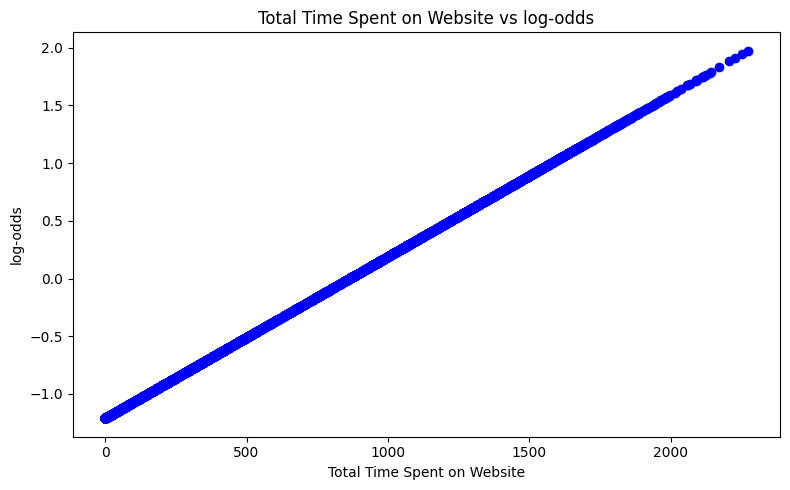

In [ ]:
# checking the assumption 3 : Linearity of independent variables and log of odds. Log(x) or Logit

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_linearity, y)

# Predict probabilities
predicted = model.predict_proba(X_linearity)[:, 1]

# Calculate log-odds
log_odds = np.log(predicted / (1 - predicted))

# Convert X_linearity to NumPy array
X_linearity_np = X_linearity.to_numpy()

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_linearity_np, log_odds, color="blue")
ax.set_xlabel("Total Time Spent on Website")
ax.set_ylabel("log-odds")
ax.set_title("Total Time Spent on Website vs log-odds")

plt.tight_layout()
plt.show()

Observation : We see a steep Linearity in 'Total Time spent on website' and log odds of target feature

Results : The above analysis proves us that the data is significant to use on a logistic regression as the data falls within the assumptions of logistic regression

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify = y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6351, 15), (2723, 15), (6351,), (2723,))

In [ ]:
X_train.sample(10)

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,
606872,1,1442,0,0,0,0,1,0,1,0,0,0,0,1,0
610866,0,446,1,0,0,0,1,0,0,1,0,0,1,0,0
624563,0,15,0,0,0,0,0,1,0,0,1,0,1,0,0
628048,0,1257,0,1,0,0,0,1,0,0,0,0,0,0,1
588064,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
582917,0,126,0,1,0,0,0,1,0,0,0,0,0,1,0
644924,0,469,0,0,0,0,0,1,1,0,0,0,1,0,0
619567,0,151,0,1,0,0,0,1,0,0,0,0,0,0,1
658888,0,333,1,0,0,0,1,0,0,0,0,1,1,0,0


Sacling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,
603283,0,223,0,0,0,0,1,0,0,0,0,1,0,1,0
643998,0,942,0,1,0,0,0,0,0,0,0,1,0,1,0
640456,0,258,0,1,0,0,0,1,0,0,0,0,1,0,0
653559,0,211,0,0,0,0,0,1,1,0,0,0,1,0,0
652863,0,340,1,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
scaler = StandardScaler()

X_train['Total Time Spent on Website'] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,
603283,0,-0.482822,0,0,0,0,1,0,0,0,0,1,0,1,0
643998,0,0.839332,0,1,0,0,0,0,0,0,0,1,0,1,0
640456,0,-0.418461,0,1,0,0,0,1,0,0,0,0,1,0,0
653559,0,-0.504889,0,0,0,0,0,1,1,0,0,0,1,0,0
652863,0,-0.267673,1,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
X_train['Total Time Spent on Website'].min(), X_train['Total Time Spent on Website'].max(), X_train['Total Time Spent on Website'].std()

(-0.8928922927252501, 3.1655149659122492, 1.0000787370577182)

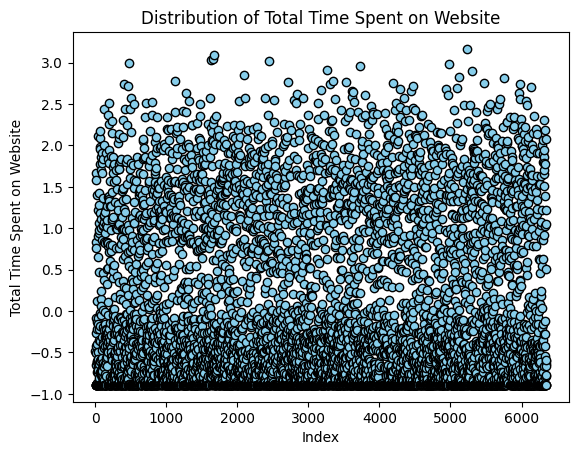

In [ ]:
# Plot the distribution
plt.scatter(range(len(X_train)), X_train['Total Time Spent on Website'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Total Time Spent on Website')
plt.title('Distribution of Total Time Spent on Website')

# Show plot
plt.show()

In [ ]:
# Performing the scaling for test data

scaler = StandardScaler()

X_test['Total Time Spent on Website'] = scaler.fit_transform(X_test[['Total Time Spent on Website']])

X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,
620385,0,1.043551,0,0,0,0,0,1,0,0,0,1,1,0,0
626664,0,-0.633852,1,0,0,0,0,0,0,0,0,1,1,0,0
594596,0,1.492074,1,0,0,0,1,0,0,0,0,1,1,0,0
619098,0,1.468372,1,0,0,0,1,0,0,1,0,0,1,0,0
634298,0,-0.869053,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test['Total Time Spent on Website'].min(), X_test['Total Time Spent on Website'].max(), X_test['Total Time Spent on Website'].std()

(-0.8690530193710918, 3.2734038682922817, 1.000183671596737)

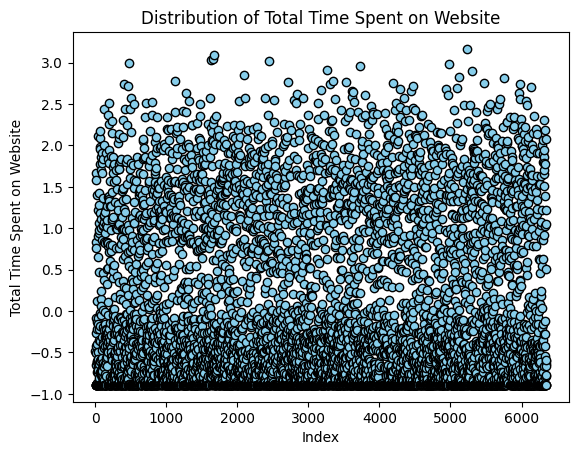

In [ ]:
# Plot the distribution
plt.scatter(range(len(X_train)), X_train['Total Time Spent on Website'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Total Time Spent on Website')
plt.title('Distribution of Total Time Spent on Website')

# Show plot
plt.show()

Checking the Statistical Significance of the data

In [ ]:
import statsmodels.api as sm

In [ ]:
# Generalized Linear Model with Binomial (Logistic regression)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.6
Date:                Fri, 08 Mar 2024   Deviance:                       5509.2
Time:                        15:00:23   Pearson chi2:                 6.45e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3682
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3409      0.186    -12.613      0.000      -2.705      -1.977
Do Not Email                                -1.3435      0.166     -8.114      0.000      -1.668      -1.019
Total Time Spent on Website                  1.0777      0.037     28.778      0.000       1.004       1.151
A free copy of Mastering The Interview      -0.3078      0.101     -3.061      0.002      -0.505      -0.111
Lead Origin_API                              1.2721      0.126     10.076      0.000       1.025       1.520
Lead Origin_Lead Add Form                    4.7496      0.242     19.595      0.000       4.275       5.225
Lead Origin_Lead Import                      1.4358      0.496      2.892      0.004       0.463       2.409
Lead Source_Direct Traffic                  -0.4614      0.108     -4.288      0.000      -0.672      -0.251
Lead Source_Google                          -0.4037      0.095     -4.240      0.000      -0.590      -0.217
Specialization_Finance Management            1.5893      0.153     10.356      0.000       1.288       1.890
Specialization_Human Resource Management     1.5162      0.154      9.832      0.000       1.214       1.818
Specialization_Marketing Management          1.6692      0.153     10.921      0.000       1.370       1.969
Specialization_Other_specialization          1.5484      0.130     11.954      0.000       1.295       1.802
Last Activity_Email Opened                   0.2543      0.130      1.961      0.050       0.000       0.508
Last Activity_Modified                      -0.3765      0.131     -2.873      0.004      -0.633      -0.120
Last Activity_SMS Sent                       1.7541      0.133     13.164      0.000       1.493       2.015
============================================================================================================
"""

Observations : We see all features lower p values which states that data is statistically significant for modelling

In [ ]:
# Taking the hard copy of X_train and y_test

import copy

X_label = copy.deepcopy(X_train)

y_label = copy.deepcopy(y_train)

Performing the Feature Importance - Selection

In [ ]:
# Technique 1 - Correlation Analysis

# Calculate correlation coefficients between features with target variable
correlations = X_label.corrwith(y_label)

# Convert Series to DataFrame
fi_df1 = pd.DataFrame({'feature': X_label.columns,'corr_importance': correlations}).sort_values(by='corr_importance', ascending=False).reset_index(drop=True)

# Display DataFrame
fi_df1

,feature,corr_importance
0,Total Time Spent on Website,0.373581
1,Last Activity_SMS Sent,0.367450
2,Lead Origin_Lead Add Form,0.297210
3,Specialization_Marketing Management,0.072802
4,Specialization_Other_specialization,0.064196
5,Specialization_Human Resource Management,0.045888
6,Specialization_Finance Management,0.042831
7,Lead Source_Google,0.023700
8,Lead Origin_Lead Import,-0.009220
9,Last Activity_Email Opened,-0.017942


In [ ]:
# Technique 2 - Random Forest Feature Importance

from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
1,Total Time Spent on Website,0.575757
4,Lead Origin_Lead Add Form,0.146570
14,Last Activity_SMS Sent,0.076105
11,Specialization_Other_specialization,0.023624
3,Lead Origin_API,0.022748
7,Lead Source_Google,0.022222
2,A free copy of Mastering The Interview,0.021855
6,Lead Source_Direct Traffic,0.020869
9,Specialization_Human Resource Management,0.019638
0,Do Not Email,0.017784


In [ ]:
# Technique 3 - Gradient Boosting Feature importances

from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
1,Total Time Spent on Website,0.457048
4,Lead Origin_Lead Add Form,0.273801
14,Last Activity_SMS Sent,0.148140
13,Last Activity_Modified,0.032940
0,Do Not Email,0.027795
3,Lead Origin_API,0.026767
11,Specialization_Other_specialization,0.010656
6,Lead Source_Direct Traffic,0.004573
10,Specialization_Marketing Management,0.004073
8,Specialization_Finance Management,0.004019


In [ ]:
# Technique 4 - Permutation Importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
1,Total Time Spent on Website,0.425958
4,Lead Origin_Lead Add Form,0.155236
14,Last Activity_SMS Sent,0.152624
11,Specialization_Other_specialization,0.067703
0,Do Not Email,0.026259
9,Specialization_Human Resource Management,0.019910
3,Lead Origin_API,0.013940
13,Last Activity_Modified,0.010445
8,Specialization_Finance Management,0.006967
12,Last Activity_Email Opened,0.006869


In [ ]:
# Technique 5 - LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
1,Total Time Spent on Website,0.182782
4,Lead Origin_Lead Add Form,0.151333
14,Last Activity_SMS Sent,0.110823
3,Lead Origin_API,0.009226
10,Specialization_Marketing Management,0.008009
11,Specialization_Other_specialization,0.005167
2,A free copy of Mastering The Interview,-0.000000
5,Lead Origin_Lead Import,0.000000
8,Specialization_Finance Management,0.000000
9,Specialization_Human Resource Management,0.000000


In [ ]:
# Technique 6 - RFE

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
1,Total Time Spent on Website,0.574264
4,Lead Origin_Lead Add Form,0.147501
14,Last Activity_SMS Sent,0.076858
11,Specialization_Other_specialization,0.023805
7,Lead Source_Google,0.022794
3,Lead Origin_API,0.022543
2,A free copy of Mastering The Interview,0.022464
6,Lead Source_Direct Traffic,0.020279
9,Specialization_Human Resource Management,0.019070
0,Do Not Email,0.017507


In [ ]:
# Technique 7 - Linear Regression Weights

from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
1,Total Time Spent on Website,0.192206
4,Lead Origin_Lead Add Form,0.170891
14,Last Activity_SMS Sent,0.131364
11,Specialization_Other_specialization,0.105052
3,Lead Origin_API,0.088454
8,Specialization_Finance Management,0.069021
10,Specialization_Marketing Management,0.068943
9,Specialization_Human Resource Management,0.062789
12,Last Activity_Email Opened,0.021782
5,Lead Origin_Lead Import,0.013160


In [ ]:
# Technique 8 - SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 2.19164560e-02, -1.34593610e-01,  4.86547093e-02, ...,
         9.91055814e-03, -1.11668792e-02, -5.59857756e-02],
       [ 2.92395512e-02,  3.65896370e-01,  3.46156476e-02, ...,
        -9.06427708e-03, -4.31727839e-02, -7.55183048e-02],
       [ 3.64615934e-03, -1.94225623e-01, -3.54315268e-04, ...,
         4.64350349e-02,  8.68537655e-03, -4.09601247e-02],
       ...,
       [ 1.79267521e-03,  4.79187262e-02,  8.32681526e-04, ...,
        -1.10297018e-02, -5.69634742e-02, -7.96416717e-02],
       [ 6.87831802e-03, -2.07673263e-01,  3.21412910e-03, ...,
        -2.54749238e-02, -1.23440873e-02, -6.61182780e-02],
       [ 9.12084416e-03, -1.87590714e-01,  1.14579967e-02, ...,
        -1.84391885e-02, -7.90763422e-03, -4.81423377e-02]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
1,Total Time Spent on Website,0.189419
14,Last Activity_SMS Sent,0.102632
4,Lead Origin_Lead Add Form,0.067297
11,Specialization_Other_specialization,0.033236
12,Last Activity_Email Opened,0.024800
3,Lead Origin_API,0.021649
0,Do Not Email,0.021508
13,Last Activity_Modified,0.020647
6,Lead Source_Direct Traffic,0.012828
8,Specialization_Finance Management,0.012579


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:
final_fi_df

,corr_importance,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
Total Time Spent on Website,0.373581,0.575757,0.457048,0.425958,0.182782,0.574264,0.192206,0.189419
Last Activity_SMS Sent,0.367450,0.076105,0.148140,0.152624,0.110823,0.076858,0.131364,0.102632
Lead Origin_Lead Add Form,0.297210,0.146570,0.273801,0.155236,0.151333,0.147501,0.170891,0.067297
Specialization_Marketing Management,0.072802,0.012471,0.004073,0.003648,0.008009,0.012416,0.068943,0.012578
Specialization_Other_specialization,0.064196,0.023624,0.010656,0.067703,0.005167,0.023805,0.105052,0.033236
Specialization_Human Resource Management,0.045888,0.019638,0.001913,0.019910,0.000000,0.019070,0.062789,0.011172
Specialization_Finance Management,0.042831,0.015688,0.004019,0.006967,0.000000,0.016116,0.069021,0.012579
Lead Source_Google,0.023700,0.022222,0.002353,-0.004977,-0.001240,0.022794,-0.029687,0.009808
Lead Origin_Lead Import,-0.009220,0.000900,0.002584,-0.000434,0.000000,0.000737,0.013160,0.000480


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
Total Time Spent on Website                 0.488156
Lead Origin_Lead Add Form                   0.173711
Last Activity_SMS Sent                      0.132607
Specialization_Other_specialization         0.039257
Do Not Email                                0.026471
Lead Origin_API                             0.025487
Last Activity_Modified                      0.021686
Specialization_Human Resource Management    0.016761
Last Activity_Email Opened                  0.015441
Specialization_Finance Management           0.013339
Lead Source_Direct Traffic                  0.012185
Lead Source_Google                          0.011897
Specialization_Marketing Management         0.011204
A free copy of Mastering The Interview      0.010878
Lead Origin_Lead Import                     0.000919
dtype: float64

Observation : Based on the above feature importance technique we see 'Lead Origin_Lead Import' feature doesn't have the much significance to output  feature in modelling, so dropping the feature from the data

In [ ]:
X_train.drop(['Lead Origin_Lead Import'], axis=1, inplace=True)

In [ ]:
X_test.drop(['Lead Origin_Lead Import'], axis=1, inplace=True)

Sampling the data

In [ ]:
# Reviewing the data imbalance
leads['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

Observation : In reference to actual data, we see there is an slight imbalance in the data between converted and non converted users, 62%:37%. Following sampling techniques will be used

1. Under Sampling technique
2. Over Sampling technique
3. SMOTE Sampling technique

In [ ]:
# importing the libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Random Under Sampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled_undersampling, y_train_resampled_undersampling = undersampler.fit_resample(X_train, y_train)
print(X_train_resampled_undersampling.shape, y_train_resampled_undersampling.shape)

# Random Over Sampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled_oversampling, y_train_resampled_oversampling = oversampler.fit_resample(X_train, y_train)
print(X_train_resampled_oversampling.shape, y_train_resampled_oversampling.shape)

# SMOTE(Synthetic Minority Over-sampling Technique) Sampler
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)
print(X_train_resampled_smote.shape, y_train_resampled_smote.shape)

(4808, 14) (4808,)
(7894, 14) (7894,)
(7894, 14) (7894,)


In [ ]:
X_train.shape, y_train.shape

((6351, 14), (6351,))

Data Modelling

In [ ]:
# importing the libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
# Base model

pipeline = Pipeline([
    ('classification', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7763496143958869
Confusion Matrix:
 [[1475  217]
 [ 392  639]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1692
           1       0.75      0.62      0.68      1031

    accuracy                           0.78      2723
   macro avg       0.77      0.75      0.75      2723
weighted avg       0.77      0.78      0.77      2723



Observation : Model is making the descent prediction on the base logistic model

Cross Validation Technique

In [ ]:
# Applying the cross validation Technique on Original data

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Calculate mean cross-validated scores for each metric
mean_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(pipeline, X_train, y_train, cv=100, scoring=metric)
    mean_scores[metric] = np.mean(scores)

# Print mean scores for each metric
for metric, mean_score in mean_scores.items():
    print(f"Mean {metric}: {mean_score}")

Mean accuracy: 0.7948561507936509
Mean precision: 0.7652299865541049
Mean recall: 0.6655833333333334
Mean roc_auc: 0.8689195779914531


In [ ]:
X_train_resampled_undersampling.shape, y_train_resampled_oversampling.shape

((4808, 14), (7894,))

In [ ]:
# Applying the cross validation Technique on Under Sampled data

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Calculate mean cross-validated scores for each metric
mean_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(pipeline, X_train_resampled_undersampling, y_train_resampled_undersampling, cv=100, scoring=metric)
    mean_scores[metric] = np.mean(scores)

# Print mean scores for each metric
for metric, mean_score in mean_scores.items():
    print(f"Mean {metric}: {mean_score}")

Mean accuracy: 0.801955782312925
Mean precision: 0.8110112858510214
Mean recall: 0.7945500000000001
Mean roc_auc: 0.8707996527777779


In [ ]:
# Applying the cross validation Technique on Over Sampled data

scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Calculate mean cross-validated scores for each metric
mean_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(pipeline, X_train_resampled_oversampling, y_train_resampled_oversampling, cv=100, scoring=metric)
    mean_scores[metric] = np.mean(scores)

# Print mean scores for each metric
for metric, mean_score in mean_scores.items():
    print(f"Mean {metric}: {mean_score}")

Mean accuracy: 0.8016196040246671
Mean precision: 0.807077406352027
Mean recall: 0.7969551282051284
Mean roc_auc: 0.8704511012491782


In [ ]:
# Applying the cross validation Technique on SMOTE Sampled data

scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Calculate mean cross-validated scores for each metric
mean_scores = {}
for metric in scoring_metrics:
    scores = cross_val_score(pipeline, X_train_resampled_smote, y_train_resampled_smote, cv=100, scoring=metric)
    mean_scores[metric] = np.mean(scores)

# Print mean scores for each metric
for metric, mean_score in mean_scores.items():
    print(f"Mean {metric}: {mean_score}")

Mean accuracy: 0.8032635507951963
Mean precision: 0.8092481638058823
Mean recall: 0.7970128205128205
Mean roc_auc: 0.8678233070348454


Observation : Based on the above results, it reliable to use Oversampled data

1. Solving the class imbalance has seen to increase the model predictability.  
2. Recall rate, roc_auc score are comparatively better any others.
3. Doesn't reduce the diversity of the dataset or add the synthetic samples, however may sligthly lead to overfitting which could be regularized while modelling.

Model Building

In [ ]:
# Defining the logistic parameters
param_grid = {
    'penalty': ['l1', 'l2'], # Regularization
    'C': np.logspace(-4, 4, 50), # C stands for 1/ lambda score, the closer it is to zero the stronger the Regularization.
    'solver': ['saga'], # selected saga solver
    'max_iter': [200, 400, 600, 800, 1000],  # adjust based on the size of the dataset and convergence
    # 'class_weight': [None, 'balanced']  # 'balanced' is useful for imbalanced datasets
}

In [ ]:
# Lambda works as a knob to adjust the overfitting (Low lambda) and underfitting (High lambda) in bias, variance trade off.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [ ]:
# Initialize logistic regression model
lr = LogisticRegression()

scoring_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=50, scoring= scoring_metrics, verbose=1, n_jobs=-1, refit='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_resampled_oversampling, y_train_resampled_oversampling)

# Best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Best cross-validation score
print("Best cross-validation score:")
print(grid_search.best_score_)

# Fitting 50 folds for each of 500 candidates, totalling 25000 fits
# Best parameters found:
# {'C': 0.18420699693267145, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
# Best cross-validation score:
# 0.8036499234056277

Fitting 50 folds for each of 500 candidates, totalling 25000 fits
Best parameters found:
{'C': 0.019306977288832496, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:
0.8032717890832863


In [ ]:
import numpy as np

# Access the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Get the coefficients of the selected features
coefficients = best_model.coef_[0]

# Get the indices of the non-zero coefficients, indicating the selected features
selected_features_indices = np.where(coefficients)[0]

# Ensure that the selected feature indices are within the bounds of X_train.columns
selected_features_indices = selected_features_indices[selected_features_indices < len(X_train_resampled_oversampling.columns)]

# Get the names of the selected features
selected_features_names = X_train_resampled_oversampling.columns[selected_features_indices]

# Create a dictionary to store feature scores
features_scores = {}

# Iterate over selected features and their coefficients
for feature, coefficient in zip(selected_features_names, coefficients[selected_features_indices]):
    features_scores[feature] = abs(coefficient)

# Sort the features by their scores in descending order
sorted_scores = sorted(features_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature scores
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

Lead Origin_Lead Add Form: 1.9661024278235961
Last Activity_SMS Sent: 1.2646329691357314
Total Time Spent on Website: 0.9503778447807237
Do Not Email: 0.7898018520535591
Lead Source_Direct Traffic: 0.5688659064279235
Last Activity_Modified: 0.5052651513526781
Specialization_Marketing Management: 0.48993881174977294
Lead Source_Google: 0.4501946764624249
Specialization_Other_specialization: 0.4222615602655177
Specialization_Finance Management: 0.37272209418678376
Specialization_Human Resource Management: 0.3718161362018848
A free copy of Mastering The Interview: 0.360414655583987
Lead Origin_API: 0.11644586279166307
Last Activity_Email Opened: 0.03348711744719103


In [ ]:
# Including all features
# Lead Origin_Lead Add Form: 3.6556419525451926
# Last Activity_SMS Sent: 1.833147108292389
# Specialization_Marketing Management: 1.3200776859581287
# Specialization_Other_specialization: 1.2457521570627936
# Do Not Email: 1.2080288874819471
# Specialization_Finance Management: 1.1894764125422497
# Specialization_Human Resource Management: 1.1628165485422404
# Total Time Spent on Website: 1.092682475064364
# Lead Origin_API: 0.7927877085569862
# Lead Source_Direct Traffic: 0.5616340191564692
# Lead Origin_Lead Import: 0.4658061659893789
# Lead Source_Google: 0.41540412545149014
# A free copy of Mastering The Interview: 0.34335799734252603
# Page Views Per Visit: 0.32547812131973425
# Last Activity_Email Opened: 0.3064168977998088
# Last Activity_Modified: 0.280070840203712
# TotalVisits: 0.19417448661394343

In [ ]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.019306977288832496, max_iter=200, solver='saga')

In [ ]:
best_params = grid_search.best_params_
best_params

{'C': 0.019306977288832496, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
best_score = grid_search.best_score_
best_score
# 0.8036499234056277

0.8032717890832863

In [ ]:
# calculating the training accuracy

y_pred_train = best_model.predict(X_train_resampled_oversampling)
train_accuracy = accuracy_score(y_train_resampled_oversampling, y_pred_train)
print("Training Accuracy ", train_accuracy)
# Training Accuracy  0.8039016974917659

Training Accuracy  0.8033949835317963


In [ ]:
# calculating the test accuracy

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7807565185457216


Training Accuracy  0.8033949835317963
Confusion Matrix
[[3197  750]
 [ 802 3145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3947
           1       0.81      0.80      0.80      3947

    accuracy                           0.80      7894
   macro avg       0.80      0.80      0.80      7894
weighted avg       0.80      0.80      0.80      7894



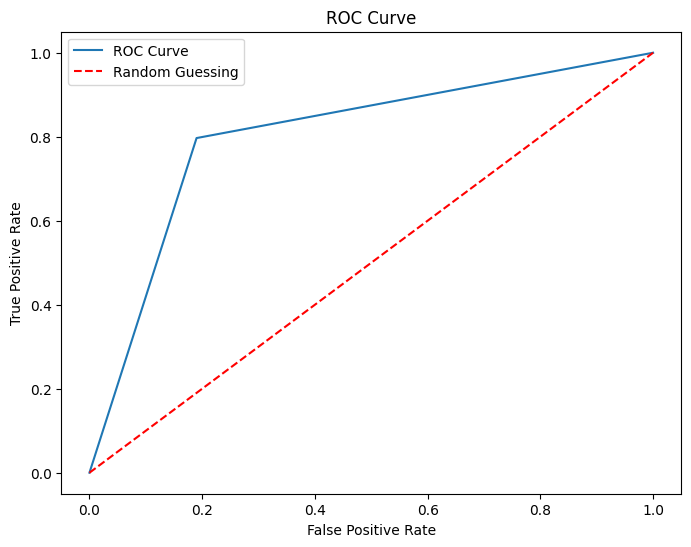

ROC AUC Score: 0.8033949835317963


In [ ]:
# Training results

# Calucating the Training accuracy
y_pred = best_model.predict(X_train_resampled_oversampling)
train_accuracy = accuracy_score(y_train_resampled_oversampling, y_pred)
print("Training Accuracy ", train_accuracy)

# Calucating the confusion matrix
confusion_mat = confusion_matrix(y_train_resampled_oversampling, y_pred)
print("Confusion Matrix")
print(confusion_mat)

# Calculate recall, precision and f1 score
class_report = classification_report(y_train_resampled_oversampling, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled_oversampling, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC score
roc_auc = roc_auc_score(y_train_resampled_oversampling, y_pred)
print("ROC AUC Score:", roc_auc)

Training Accuracy  0.7807565185457216
Confusion Matrix
[[1338  354]
 [ 243  788]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1692
           1       0.69      0.76      0.73      1031

    accuracy                           0.78      2723
   macro avg       0.77      0.78      0.77      2723
weighted avg       0.79      0.78      0.78      2723



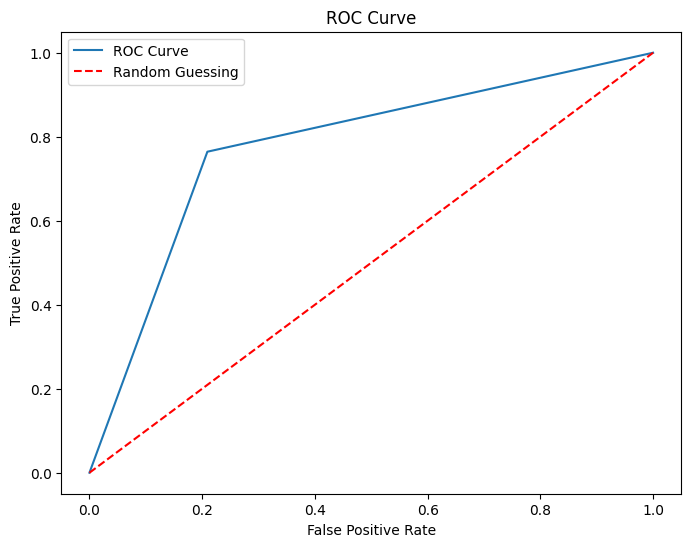

ROC AUC Score: 0.7775433201945366


In [ ]:
# Test results

# Calucating the accuracy
y_pred = best_model.predict(X_test)
train_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy ", train_accuracy)

# Calucating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(confusion_mat)

# Calculate recall, precision and f1 score
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

In [ ]:
# Finding the best threshold for the training data

y_scores = best_model.predict_proba(X_train_resampled_oversampling)[:,1]

y_scores

array([0.20606093, 0.64405851, 0.2816969 , ..., 0.68661273, 0.18610714,
       0.52361748])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_resampled_oversampling, y_scores)

In [ ]:
import plotly.graph_objects as go

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0
trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top right',  # Adjust text position
    textfont=dict(size=10)  # Adjust text font size
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Threshold (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title="Receiver Operating Characteristic with threshold",
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=1800,  # Adjust width
    height=600,  # Adjust height
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [ ]:
# Assume that fpr, tpr, thershlods have been caluclated
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is :", optimal_threshold)

Optimal threshold is : 0.4523921233469576


In [ ]:
# New threshold
new_threshold = 0.4523921233469576
new_threshold = (y_scores >= new_threshold).astype(int)

Training Accuracy  0.8045350899417278
Confusion Matrix
[[3082  865]
 [ 678 3269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3947
           1       0.79      0.83      0.81      3947

    accuracy                           0.80      7894
   macro avg       0.81      0.80      0.80      7894
weighted avg       0.81      0.80      0.80      7894



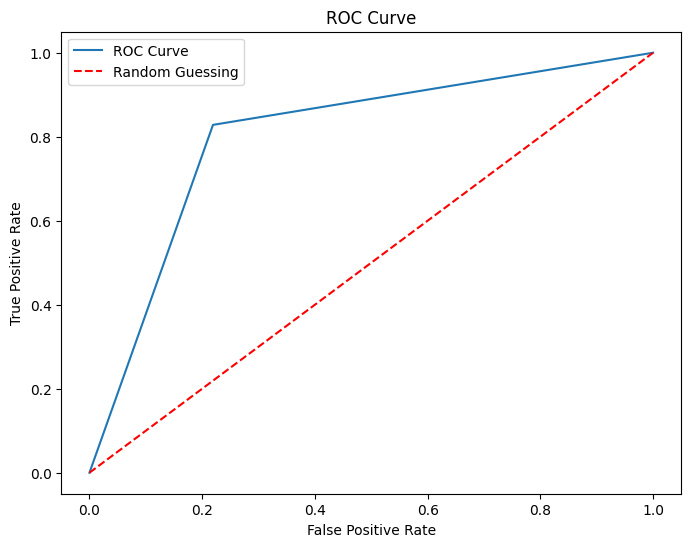

ROC AUC Score: 0.8045350899417278


In [ ]:
# Testing the new threshold with train data

# Calucating the Training accuracy
train_accuracy = accuracy_score(y_train_resampled_oversampling, new_threshold)
print("Training Accuracy ", train_accuracy)

# Calucating the confusion matrix
confusion_mat = confusion_matrix(y_train_resampled_oversampling, new_threshold)
print("Confusion Matrix")
print(confusion_mat)

# Calculate recall, precision and f1 score
class_report = classification_report(y_train_resampled_oversampling, new_threshold)
print("Classification Report:")
print(class_report)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_resampled_oversampling, new_threshold)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC score
roc_auc = roc_auc_score(y_train_resampled_oversampling, new_threshold)
print("ROC AUC Score:", roc_auc)

In [ ]:
# Finding the best threshold for the Test data

y_scores = best_model.predict_proba(X_test)[:,1]

y_scores

array([0.68118443, 0.32187538, 0.66960538, ..., 0.57860472, 0.90209329,
       0.67103773])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [ ]:
# Assume that fpr, tpr, thershlods have been caluclated
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is :", optimal_threshold)

Optimal threshold is : 0.44676481953415353


In [ ]:
# New threshold
new_threshold = 0.44676481953415353
new_threshold = (y_scores >= new_threshold).astype(int)

Training Accuracy  0.7774513404333456
Confusion Matrix
[[1294  398]
 [ 208  823]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1692
           1       0.67      0.80      0.73      1031

    accuracy                           0.78      2723
   macro avg       0.77      0.78      0.77      2723
weighted avg       0.79      0.78      0.78      2723



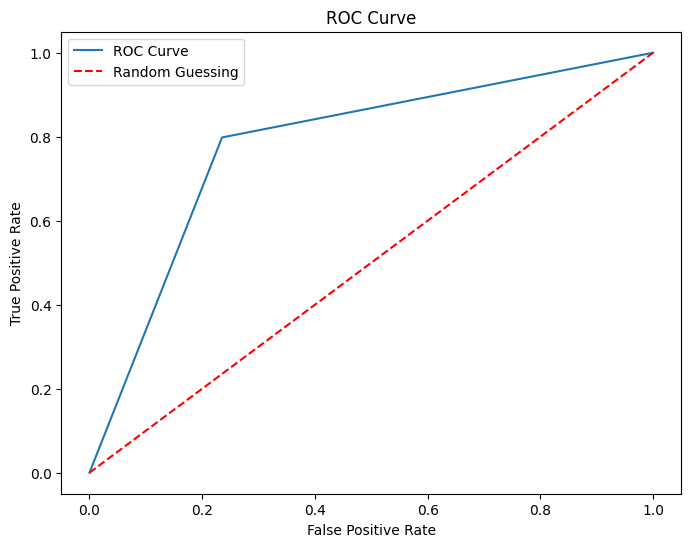

ROC AUC Score: 0.7815147679615145


In [ ]:
# Testing the new threshold with unseen data

# Calucating the accuracy
train_accuracy = accuracy_score(y_test, new_threshold)
print("Training Accuracy ", train_accuracy)

# Calucating the confusion matrix
confusion_mat = confusion_matrix(y_test, new_threshold)
print("Confusion Matrix")
print(confusion_mat)

# Calculate recall, precision and f1 score
class_report = classification_report(y_test, new_threshold)
print("Classification Report:")
print(class_report)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, new_threshold)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate AUC score
roc_auc = roc_auc_score(y_test, new_threshold)
print("ROC AUC Score:", roc_auc)

In [ ]:
# Calculate probabilities of each user being a prospective customer
user_probabilities = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to achieve a likelihood rate of above 80%
optimal_threshold = 0.44676481953415353
adjusted_threshold = np.percentile(user_probabilities, 100 - optimal_threshold * 100)
print(f"Model's estimate on the Percentage of Customers with positive likelihood rate of purchasing the program: {round(adjusted_threshold,2)}%")

# Identify users with a probability higher than the adjusted threshold
prospective_customers_indices = np.where(user_probabilities >= optimal_threshold)[0]
prospective_customers = X_test.iloc[prospective_customers_indices]
print(f"Model's estimate Number of prospective Customers identified: {len(prospective_customers)}")

Model's estimate on the Percentage of Customers with positive likelihood rate of purchasing the program: 0.45%
Model's estimate Number of prospective Customers identified: 1221


In [ ]:
# Calculate probabilities of each user being a prospective customer
user_probabilities = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to achieve a likelihood rate of above 80%
desired_likelihood_rate = 0.80
adjusted_threshold = np.percentile(user_probabilities, 100 - desired_likelihood_rate * 100)
print(f"Percentage of Customers with 80% likelihood rate of purchasing the program: {round(adjusted_threshold,2)}%")

# Identify users with a probability higher than the adjusted threshold
prospective_customers_indices = np.where(user_probabilities >= desired_likelihood_rate)[0]
prospective_customers = X_test.iloc[prospective_customers_indices]
print(f"Toal Number of prospective Customers identified: {len(prospective_customers)}")

Percentage of Customers with 80% likelihood rate of purchasing the program: 0.19%
Toal Number of prospective Customers identified: 427


Final Results:

As per the bussiness need, the sales team needed 80% likelihood rate of users  purchasing the program.

1. Out of 2,723 users (test data) we can update our Sales team to reach the 427 customers at first who have 80% likelihood rate of purchasing the program.

2. As per model we see 1221 customers also have positive estimate of purchasing the program, so we can encouarge the team to reach these users as well.

In [ ]:
prospective_customers

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,
620385,0,1.043551,0,0,0,0,1,0,0,0,1,1,0,0
594596,0,1.492074,1,0,0,1,0,0,0,0,1,1,0,0
619098,0,1.468372,1,0,0,1,0,0,1,0,0,1,0,0
634298,0,-0.869053,0,1,0,0,0,0,0,0,0,0,0,1
654894,0,0.642433,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584385,0,1.998942,1,1,0,0,0,0,0,0,1,0,1,0
637856,0,1.461079,0,0,0,0,1,0,0,0,1,0,1,0
633862,0,-0.869053,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Append the user_probabilities feature to the selected_prospective_customers DataFrame
user_probabilities > 80
prospective_customers['Probability'] = user_probabilities[prospective_customers_indices]
prospective_customers['Probability'].head(10)

Lead Number
612085    0.889181
640446    0.940499
587348    0.897219
593083    0.800590
588021    0.934419
617811    0.851906
612067    0.934207
600517    0.928999
593016    0.806199
604887    0.897219
Name: Probability, dtype: float64